# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-01 04:14:59.494087: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-01 04:14:59.494284: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 04:14:59.497121: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 04:14:59.523995: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 04:15:00.045949: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia


🌄 Graia v0.0.1

Graia initializing…
Graia ready.



In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 60000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=16, layers=2, outputs=10, seed=37, max_weight=2)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

(16, 784)  ->  (1, 16, 16)  ->  (10, 16)
Graia model with 12960 random parameters instantiated.


In [6]:
model.fit(train_images, train_labels, epochs=1)
# plt.imshow(model.hidden_weights[0])
print("\n", model.input_weights[0][:16])
print("\n", model.hidden_weights[0])
print("\n", model.output_weights)


Epoch 1/1: correct = 6115

 [-3  3 -3 -3 -3 -3  3  3 -3 -3  3  3  3  3 -3 -3]

 [[ 3 -3  3 -3  3  3  3 -3 -3  3  3 -3 -3 -3 -3  3]
 [ 3 -3 -3  3  3 -3  3 -3 -3 -3 -3  3  3 -3 -3  3]
 [ 3 -3 -3 -3  3 -3  3 -3 -3  3 -3  3  3 -3 -3  3]
 [-3  3  3  3 -3 -3  3  3 -3 -3 -3 -3  3  3 -3  3]
 [-3  3 -3 -3  3  3 -3 -3 -3 -3 -3  3  3 -3  3 -3]
 [-3  3 -3 -3  3  3  3 -3  3  3 -3  3 -3 -3 -3  3]
 [ 3  3 -3 -3 -3 -3  3  3 -3  3 -3 -3  3  3 -3 -3]
 [ 3  3  3 -3 -3  3 -3 -3  3  3 -3 -3  3  3  3 -3]
 [-3 -3 -3  3 -3  3 -3 -3 -3  3  3 -3  3  3 -3 -3]
 [-3 -3 -3  3  3  3  3 -3  3  3  3 -3 -3 -3 -3  3]
 [-3 -3  3 -3 -3  3 -3  3 -3  3  3 -3  3  3  3  3]
 [-3  3  3 -3  3 -3  3  3  3 -3 -3 -3 -3  3 -3  3]
 [ 3 -3  3 -3  3  3 -3 -3 -3  3 -3  3 -3  3 -3 -3]
 [-3 -3  3  3  3  3  3  3 -3  3  3 -3 -3  3  3  3]
 [ 3 -3  3 -3  3 -3  3 -3  3  3  3 -3  3  3 -3 -3]
 [-3  3 -3 -3 -3  3 -3 -3  3  3  3 -3 -3 -3 -3  3]]

 [[ 3  3 -3  3  3 -3  3 -3  3 -3 -3  3  3 -3  3 -3]
 [ 3 -3 -3 -3 -3 -3  3 -3  3 -3  3 -3  3 -3 -3 -3]

[ 0  0 32  0 32  0  0  0  0  0]


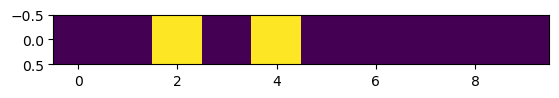

In [7]:
plt.imshow([model.last_outputs])
print(model.last_outputs)